What are the properties of the galaxies used to calibrate the TFR, and how do they compare to the overall Y1 sample?

In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import LambdaCDM, Planck18
from astropy.coordinates import Distance
import astropy.units as u
import astropy.constants as const

import numpy as np

import matplotlib.pyplot as plt

In [2]:
hdul = fits.open('SGA_iron_jointTFR-varyV0-perpdwarf-fitH0_moduli.fits')
# hdul = fits.open('/global/cfs/cdirs/desicollab/science/td/pv/tfgalaxies/Y1/DESI-DR1_TF_pv_cat_v10.fits')
SGA_TF = Table(hdul[1].data)
hdul.close()

In [3]:
# SGA_TF_clusters = Table.read('SGA-2020_iron_Vrot_cluster_calib.fits')
SGA_TF_clusters = Table.read('SGA-2020_iron_Vrot_cluster_calib_z0p1_Anthony.fits')

In [4]:
# SGA_0pt = Table.read('SGA_distances_0pt_iron.fits')
SGA_0pt = Table.read('SGA-2020_iron_Vrot_VI_0pt-Anthony2_calib_z0p1.fits')

In [5]:
def hist_norm(data, bins):
    '''
    Histogram the values in data and return a normalized count (bin/total).
    '''
    N = len(data)
    n,_ = np.histogram(data, bins=bins)
    return n/N, np.sqrt(n)/N

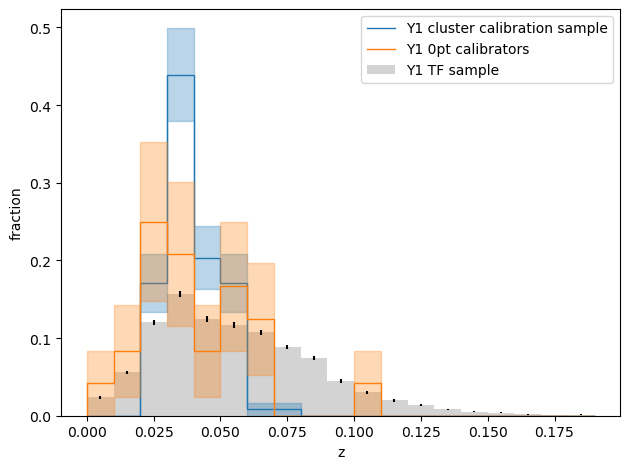

In [6]:
z_bins = np.arange(0, 0.2, 0.01)

Y1, Y1_err = hist_norm(SGA_TF['Z_DESI'], z_bins)
cluster, cluster_err = hist_norm(SGA_TF_clusters['Z_DESI'], z_bins)
zpt, zpt_err = hist_norm(SGA_0pt['Z_DESI'], z_bins)

plt.figure(tight_layout=True)

# plt.hist(SGA_TF['Z_DESI'], bins=z_bins, density=True, label='Y1 TF sample')
# plt.hist(SGA_TF_clusters['Z_DESI'], bins=z_bins, alpha=0.5, density=True, label='Y1 cluster calibration sample')
# plt.hist(SGA_0pt['Z_DESI'], bins=z_bins, alpha=0.5, density=True, label='Y1 0pt calibrators')

plt.bar(z_bins[:-1], Y1, width=0.01, align='edge', color='lightgray', label='Y1 TF sample')
plt.errorbar(z_bins[:-1] + 0.005, Y1, yerr=Y1_err, fmt='none', ecolor='k')

plt.stairs(cluster, edges=z_bins, color='tab:blue', label='Y1 cluster calibration sample')
plt.fill_between(z_bins[:-1], cluster - cluster_err, cluster + cluster_err, step='post', color='tab:blue', alpha=0.3)

plt.stairs(zpt, edges=z_bins, color='tab:orange', label='Y1 0pt calibrators')
plt.fill_between(z_bins[:-1], zpt - zpt_err, zpt + zpt_err, step='post', color='tab:orange', alpha=0.3)

plt.legend()

plt.xlabel('z')
plt.ylabel('fraction');

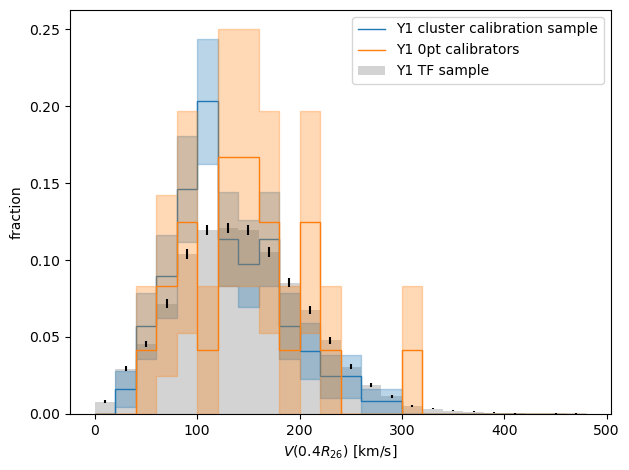

In [7]:
V0p4R26_bins = np.arange(0, 500, 20)

Y1, Y1_err = hist_norm(SGA_TF['V_0p4R26'], V0p4R26_bins)
cluster, cluster_err = hist_norm(SGA_TF_clusters['V_0p4R26'], V0p4R26_bins)
zpt, zpt_err = hist_norm(SGA_0pt['V_0p4R26'], V0p4R26_bins)

plt.figure(tight_layout=True)

# plt.hist(SGA_TF['V_0p4R26'], bins=V0p4R26_bins, density=True, label='Y1 TF sample')
# plt.hist(SGA_TF_clusters['V_0p4R26'], bins=V0p4R26_bins, alpha=0.5, density=True, label='Y1 cluster calibration sample')
# plt.hist(SGA_0pt['V_0p4R26'], bins=V0p4R26_bins, alpha=0.5, density=True, label='Y1 0pt calibrators')

plt.bar(V0p4R26_bins[:-1], Y1, width=20, align='edge', color='lightgray', label='Y1 TF sample')
plt.errorbar(V0p4R26_bins[:-1] + 10, Y1, yerr=Y1_err, fmt='none', ecolor='k')

plt.stairs(cluster, edges=V0p4R26_bins, color='tab:blue', label='Y1 cluster calibration sample')
plt.fill_between(V0p4R26_bins[:-1], cluster - cluster_err, cluster + cluster_err, step='post', color='tab:blue', alpha=0.3)

plt.stairs(zpt, edges=V0p4R26_bins, color='tab:orange', label='Y1 0pt calibrators')
plt.fill_between(V0p4R26_bins[:-1], zpt - zpt_err, zpt + zpt_err, step='post', color='tab:orange', alpha=0.3)

plt.legend()

plt.xlabel('$V(0.4 R_{26})$ [km/s]')
plt.ylabel('fraction');

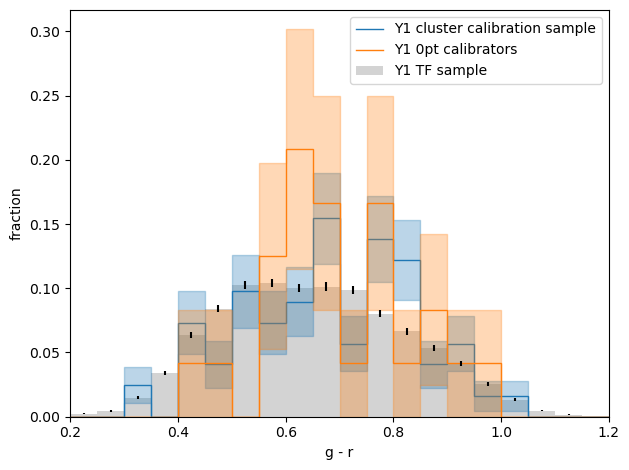

In [8]:
gr_bins = np.arange(0, 1.5, 0.05)

Y1, Y1_err = hist_norm(SGA_TF['G_MAG_SB26'] - SGA_TF['R_MAG_SB26'], gr_bins)
cluster, cluster_err = hist_norm(SGA_TF_clusters['G_MAG_SB26'] - SGA_TF_clusters['R_MAG_SB26'], gr_bins)
zpt, zpt_err = hist_norm(SGA_0pt['G_MAG_SB26'] - SGA_0pt['R_MAG_SB26'], gr_bins)

plt.figure(tight_layout=True)

# plt.hist(SGA_TF['G_MAG_SB26'] - SGA_TF['R_MAG_SB26'], bins=gr_bins, density=True, label='Y1 TF sample')
# plt.hist(SGA_TF_clusters['G_MAG_SB26'] - SGA_TF_clusters['R_MAG_SB26'], bins=gr_bins, alpha=0.5, density=True, label='Y1 cluster calibration sample')
# plt.hist(SGA_0pt['G_MAG_SB26'] - SGA_0pt['R_MAG_SB26'], bins=gr_bins, alpha=0.5, density=True, label='Y1 0pt calibrators')

plt.bar(gr_bins[:-1], Y1, width=0.05, align='edge', color='lightgray', label='Y1 TF sample')
plt.errorbar(gr_bins[:-1] + 0.025, Y1, yerr=Y1_err, fmt='none', ecolor='k')

plt.stairs(cluster, edges=gr_bins, color='tab:blue', label='Y1 cluster calibration sample')
plt.fill_between(gr_bins[:-1], cluster - cluster_err, cluster + cluster_err, step='post', color='tab:blue', alpha=0.3)

plt.stairs(zpt, edges=gr_bins, color='tab:orange', label='Y1 0pt calibrators')
plt.fill_between(gr_bins[:-1], zpt - zpt_err, zpt + zpt_err, step='post', color='tab:orange', alpha=0.3)

plt.legend()

plt.xlim(0.2, 1.2)

plt.xlabel('g - r')
plt.ylabel('fraction');

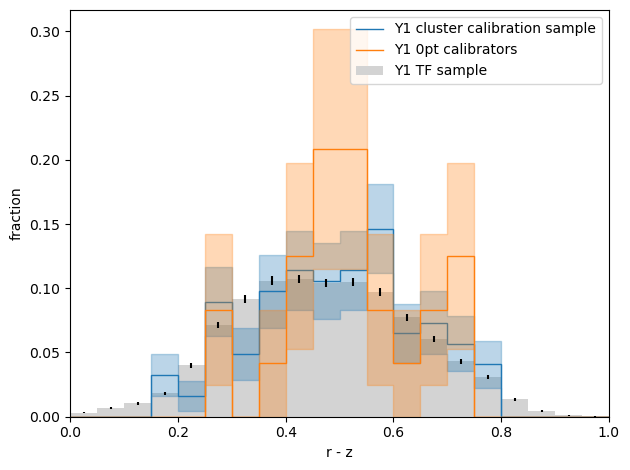

In [9]:
rz_bins = np.arange(-0.2, 1.2, 0.05)

Y1, Y1_err = hist_norm(SGA_TF['R_MAG_SB26'] - SGA_TF['Z_MAG_SB26'], rz_bins)
cluster, cluster_err = hist_norm(SGA_TF_clusters['R_MAG_SB26'] - SGA_TF_clusters['Z_MAG_SB26'], rz_bins)
zpt, zpt_err = hist_norm(SGA_0pt['R_MAG_SB26'] - SGA_0pt['Z_MAG_SB26'], rz_bins)

plt.figure(tight_layout=True)

# plt.hist(SGA_TF['R_MAG_SB26'] - SGA_TF['Z_MAG_SB26'], bins=rz_bins, density=True, label='Y1 TF sample')
# plt.hist(SGA_TF_clusters['R_MAG_SB26'] - SGA_TF_clusters['Z_MAG_SB26'], bins=rz_bins, alpha=0.5, density=True, label='Y1 cluster calibration sample')
# plt.hist(SGA_0pt['R_MAG_SB26'] - SGA_0pt['Z_MAG_SB26'], bins=rz_bins, alpha=0.5, density=True, label='Y1 0pt calibrators')

plt.bar(rz_bins[:-1], Y1, width=0.05, align='edge', color='lightgray', label='Y1 TF sample')
plt.errorbar(rz_bins[:-1] + 0.025, Y1, yerr=Y1_err, fmt='none', ecolor='k')

plt.stairs(cluster, edges=rz_bins, color='tab:blue', label='Y1 cluster calibration sample')
plt.fill_between(rz_bins[:-1], cluster - cluster_err, cluster + cluster_err, step='post', color='tab:blue', alpha=0.3)

plt.stairs(zpt, edges=rz_bins, color='tab:orange', label='Y1 0pt calibrators')
plt.fill_between(rz_bins[:-1], zpt - zpt_err, zpt + zpt_err, step='post', color='tab:orange', alpha=0.3)

plt.legend()

plt.xlim(0, 1)

plt.xlabel('r - z')
plt.ylabel('fraction');

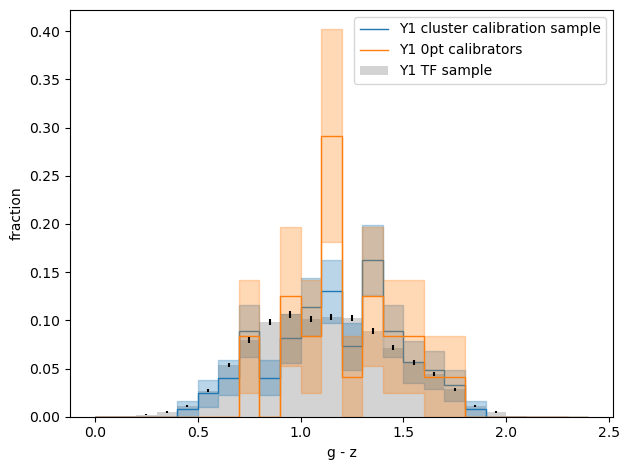

In [10]:
gz_bins = np.arange(0, 2.5, 0.1)

Y1, Y1_err = hist_norm(SGA_TF['G_MAG_SB26'] - SGA_TF['Z_MAG_SB26'], gz_bins)
cluster, cluster_err = hist_norm(SGA_TF_clusters['G_MAG_SB26'] - SGA_TF_clusters['Z_MAG_SB26'], gz_bins)
zpt, zpt_err = hist_norm(SGA_0pt['G_MAG_SB26'] - SGA_0pt['Z_MAG_SB26'], gz_bins)

plt.figure(tight_layout=True)

# plt.hist(SGA_TF['G_MAG_SB26'] - SGA_TF['Z_MAG_SB26'], bins=gz_bins, density=True, label='Y1 TF sample')
# plt.hist(SGA_TF_clusters['G_MAG_SB26'] - SGA_TF_clusters['Z_MAG_SB26'], bins=gz_bins, alpha=0.5, density=True, label='Y1 cluster calibration sample')
# plt.hist(SGA_0pt['G_MAG_SB26'] - SGA_0pt['Z_MAG_SB26'], bins=gz_bins, alpha=0.5, density=True, label='Y1 0pt calibrators')

plt.bar(gz_bins[:-1], Y1, width=0.1, align='edge', color='lightgray', label='Y1 TF sample')
plt.errorbar(gz_bins[:-1] + 0.05, Y1, yerr=Y1_err, fmt='none', ecolor='k')

plt.stairs(cluster, edges=gz_bins, color='tab:blue', label='Y1 cluster calibration sample')
plt.fill_between(gz_bins[:-1], cluster - cluster_err, cluster + cluster_err, step='post', color='tab:blue', alpha=0.3)

plt.stairs(zpt, edges=gz_bins, color='tab:orange', label='Y1 0pt calibrators')
plt.fill_between(gz_bins[:-1], zpt - zpt_err, zpt + zpt_err, step='post', color='tab:orange', alpha=0.3)

plt.legend()

plt.xlabel('g - z')
plt.ylabel('fraction');

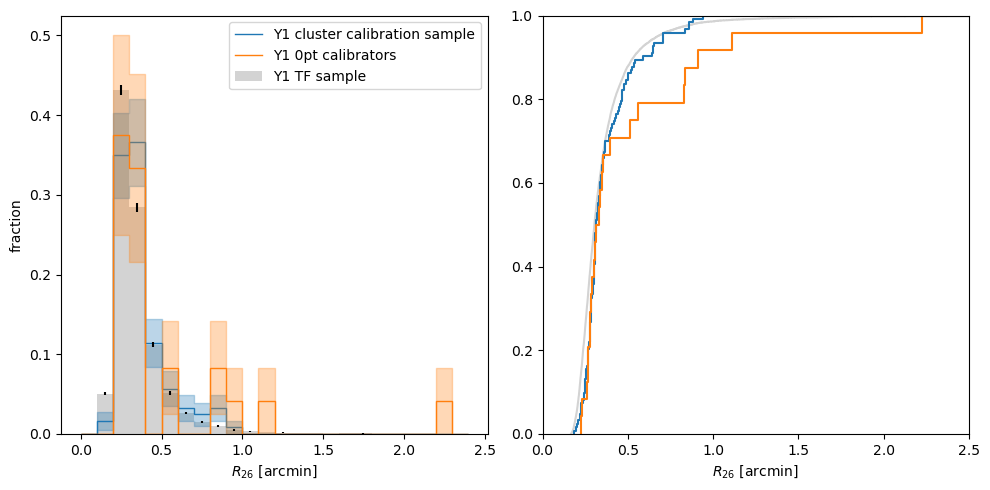

In [11]:
R26_bins = np.arange(0, 2.5, 0.1)

Y1, Y1_err = hist_norm(0.5*SGA_TF['D26'], R26_bins)
cluster, cluster_err = hist_norm(0.5*SGA_TF_clusters['D26'], R26_bins)
zpt, zpt_err = hist_norm(0.5*SGA_0pt['D26'], R26_bins)



plt.figure(figsize=(10,5), tight_layout=True)

plt.subplot(121)
plt.bar(R26_bins[:-1], Y1, width=0.1, align='edge', color='lightgray', label='Y1 TF sample')
plt.errorbar(R26_bins[:-1] + 0.05, Y1, yerr=Y1_err, fmt='none', ecolor='k')

plt.stairs(cluster, edges=R26_bins, color='tab:blue', label='Y1 cluster calibration sample')
plt.fill_between(R26_bins[:-1], 
                 cluster - cluster_err, cluster + cluster_err, 
                 step='post', color='tab:blue', alpha=0.3)

plt.stairs(zpt, edges=R26_bins, color='tab:orange', label='Y1 0pt calibrators')
plt.fill_between(R26_bins[:-1], 
                 zpt - zpt_err, zpt + zpt_err, 
                 step='post', color='tab:orange', alpha=0.3)

plt.legend()

plt.xlabel('$R_{26}$ [arcmin]')
plt.ylabel('fraction')


plt.subplot(122)
plt.ecdf(0.5*SGA_TF['D26'], color='lightgray', label='Y1 TF sample')
plt.ecdf(0.5*SGA_TF_clusters['D26'], color='tab:blue', label='Y1 cluster calibration sample')
plt.ecdf(0.5*SGA_0pt['D26'], color='tab:orange', label='Y1 0pt calibrators')

plt.xlim(0, 2.5)

plt.xlabel('$R_{26}$ [arcmin]');

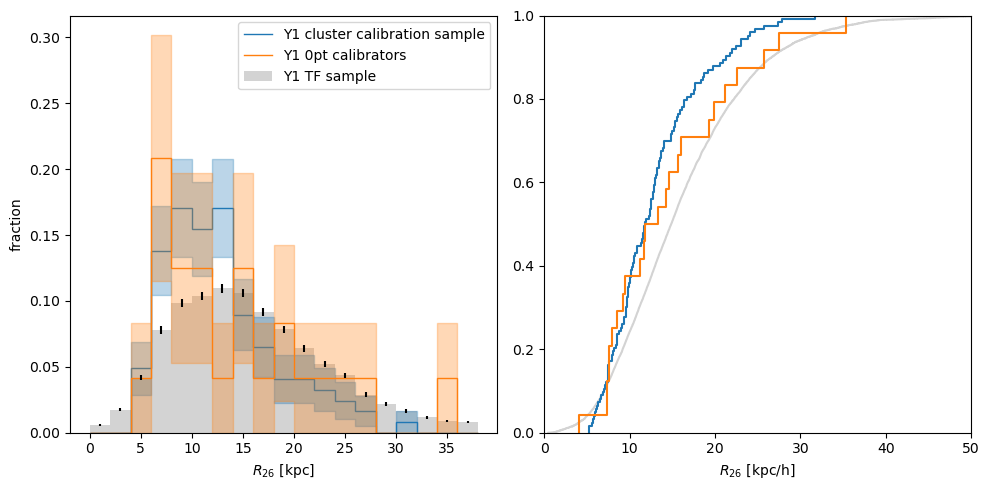

In [12]:
R26kpc_bins = np.arange(0, 40, 2)

Planck18_h = LambdaCDM(H0=100, 
                       Om0=Planck18.Om0, 
                       Tcmb0=Planck18.Tcmb0, 
                       Neff=Planck18.Neff, 
                       m_nu=Planck18.m_nu, 
                       Ob0=Planck18.Ob0, 
                       Ode0=Planck18.Ode0)
dist = Distance(z=np.abs(SGA_TF['Z_DESI']), cosmology=Planck18_h)
SGA_TF['D26_kpc'] = 2*dist.to('kpc')*np.tan(0.5*SGA_TF['D26']*u.arcmin)

Y1, Y1_err = hist_norm(0.5*SGA_TF['D26_kpc'], R26kpc_bins)
cluster, cluster_err = hist_norm(0.5*SGA_TF_clusters['D26_kpc'], R26kpc_bins)
zpt, zpt_err = hist_norm(0.5*SGA_0pt['D26_kpc'], R26kpc_bins)



plt.figure(figsize=(10,5), tight_layout=True)

plt.subplot(121)
plt.bar(R26kpc_bins[:-1], Y1, width=2, align='edge', color='lightgray', label='Y1 TF sample')
plt.errorbar(R26kpc_bins[:-1] + 1, Y1, yerr=Y1_err, fmt='none', ecolor='k')

plt.stairs(cluster, edges=R26kpc_bins, color='tab:blue', label='Y1 cluster calibration sample')
plt.fill_between(R26kpc_bins[:-1], 
                 cluster - cluster_err, cluster + cluster_err, 
                 step='post', color='tab:blue', alpha=0.3)

plt.stairs(zpt, edges=R26kpc_bins, color='tab:orange', label='Y1 0pt calibrators')
plt.fill_between(R26kpc_bins[:-1], 
                 zpt - zpt_err, zpt + zpt_err, 
                 step='post', color='tab:orange', alpha=0.3)

plt.legend()

plt.xlabel('$R_{26}$ [kpc]')
plt.ylabel('fraction')


plt.subplot(122)
plt.ecdf(0.5*SGA_TF['D26_kpc'], color='lightgray', label='Y1 TF sample')
plt.ecdf(0.5*SGA_TF_clusters['D26_kpc'], color='tab:blue', label='Y1 cluster calibration sample')
plt.ecdf(0.5*SGA_0pt['D26_kpc'], color='tab:orange', label='Y1 0pt calibrators')

plt.xlim(0, 50)

plt.xlabel('$R_{26}$ [kpc/h]');

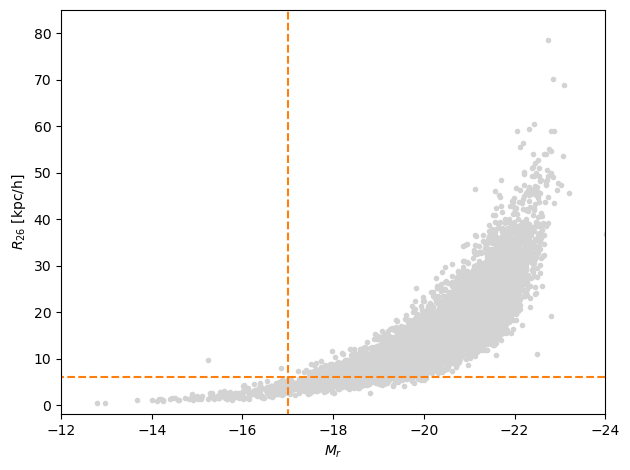

In [16]:
plt.figure(tight_layout=True)

plt.plot(SGA_TF['R_ABSMAG_SB26'], 0.5*SGA_TF['D26_kpc'], 
         '.', c='lightgray')

plt.vlines(-17, -5, 90, colors='tab:orange', linestyles='dashed')
plt.hlines(6, -24, -12, colors='tab:orange', linestyles='dashed')

plt.xlim(-12, -24)
plt.ylim(-2, 85)

plt.xlabel('$M_r$')
plt.ylabel('$R_{26}$ [kpc/h]');